**LEAD University - Minería de datos**

Python Project

**Contributors**
- Carolina Salas Moreno
- Deykel Bernard Salazar
- Esteban Ramirez Montano
- Kristhel Porras Mata
- Marla Gomez Hernández


## Requirements
**Step 1:** Please install Microsoft C++ Build Tools in your machine.

**Step 2:** Install Python 3.11.7

**Step 3:** Run the following code if this is your first time running it `pip freeze > requirements.txt`

# Importar las librerías

In [2]:
# Main Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import umap.umap_ as umap

# Clustering Libraries
from abc import ABCMeta, abstractmethod
from scipy.cluster.hierarchy import dendrogram, ward, single, complete, average, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Dimensionality Reduction
from prince import PCA as PCA_Prince
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Evaluation Metrics
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Additional Tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## EDA

In [5]:
# Análisis Exploratorio de Datos (EDA)
class EDA:
    def __init__(self, file=None):
        """
        Inicializa la clase EDA y carga datos desde un archivo CSV si se proporciona.

        Parámetros:
            file (str): Ruta al archivo CSV. Si no se proporciona, se inicializa un DataFrame vacío.
        """
        self.__df = pd.read_csv(file) if file else pd.DataFrame()

    def head_df(self, n=5):
        return self.__df.head(n) if not self.__df.empty else "No se cargaron los datos :("

    def tail_df(self, n=5):
        return self.__df.tail(n) if not self.__df.empty else "No se cargaron los datos :("

    def check_data_types(self):
        return self.__df.dtypes

    def drop_irrelevant_columns(self, columns):
        self.__df.drop(columns=columns, inplace=True)

    def drop_missing_values(self):
        self.__df.dropna(inplace=True)

    def detect_outliers(self):
        num_df = self.__df.select_dtypes(include=['float64', 'int64'])
        if num_df.empty:
            return "No hay columnas numéricas en el DataFrame."

        Q1 = num_df.quantile(0.25)
        Q3 = num_df.quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).sum()
        Dicc_outliers = {col: outliers[col] for col in num_df.columns if outliers[col] > 0}

        return Dicc_outliers if Dicc_outliers else "No se detectaron valores atípicos en las columnas numéricas."

    def plot_scatter(self, col1, col2):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.__df[col1], y=self.__df[col2])
        plt.title(f'Gráfico de Dispersión: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid()
        plt.show()

    def plot_histogram(self, col):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.__df[col], kde=True)
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

    def plot_heatmap(self):
        num_df = self.__df.select_dtypes(include=['float64', 'int64'])
        if num_df.empty:
            return "No hay columnas numéricas para generar el mapa de calor."

        num_df = num_df.loc[:, num_df.apply(lambda x: np.std(x) > 0.01)]

        plt.figure(figsize=(12, 10))
        sns.heatmap(num_df.corr(), cmap="coolwarm", annot= True, linewidths=0.5, cbar=True) #annot=False es para que no se vean los numeros en los cuadros
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.title("Correlation heatmap", fontsize=18)
        plt.ion()

    def __str__(self):
        return f"Clase EDA - DataFrame de la forma: {self.__df.shape}"

    def get_df(self):
        """Devuelve una copia del df para que las familias de los algoritmos las utilicen"""
        return self.__df.copy()

In [ ]:
# Optimization of datasets
class DataOptimization(EDA):
    def __init__(self, datos_eda):
        # The class already uses the processed dataframe from the EDA class
        df = datos_eda.get_df()
        super().__init__()
        self.__df = df

    def data_split(self):
        """
        Asks the user for the percentage of data to be used for training.
        """
        while True:
            try:
                porcentaje = float(input("Enter the percentage for the training set: "))
                if 0 < porcentaje < 100:
                    return porcentaje / 100
                else:
                    print("The percentage must be between 1 and 99.")
            except ValueError:
                print("Invalid number, use your mind.")

    def genetic_search(self):
        """
        Potential solutions obtained using targeted individual-level searches.
        """
        pass

    def exhaustive_search(self):
        """
        Solves optimization problems by creating a population or group of possible solutions to the problem.
        """
        pass


In [22]:
class NoSupervisado(EDA):
    def __init__(self, datos_eda):
        # La clase ya utiliza el df procesado en la clase EDA
        df = datos_eda.get_df()
        super().__init__()
        self.__df = df

    @property
    def df(self):
        return self.__df

    @df.setter
    def df(self, p_df):
        self.__df = p_df

    def __byebye_object_values(self):
        # Elimina columnas de tipo 'object'
        self.__df = self.__df.select_dtypes(exclude=['object'])

    def calcular_metricas(self, labels):
        """
        Calcula métricas de evaluación para clustering.
        """
        data = self.__df.dropna()
        data = (data - data.mean()) / data.std()
        metrics = {
            "Índice de Silueta": silhouette_score(data, labels),
            "Calinski-Harabasz": calinski_harabasz_score(data, labels),
            "Davies-Bouldin": davies_bouldin_score(data, labels)
        }
        return metrics

    def kmeans(self, n_clusters):
        self.__byebye_object_values()
        data = self.__df
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data)
        metrics = self.calcular_metricas(labels)
        print(f"Métricas para K-Means (n_clusters={n_clusters}): {metrics}")
        return metrics

    def k_medoids(self, n_clusters, metric='euclidean'):
        self.__byebye_object_values()
        data = self.__df
        kmedoids = KMedoids(n_clusters=n_clusters, metric=metric, random_state=42)
        labels = kmedoids.fit_predict(data)
        metrics = self.calcular_metricas(labels)
        print(f"Métricas para K-Medoids (n_clusters={n_clusters}, metric={metric}): {metrics}")
        return metrics

    def hac(self, n_clusters=3, method='ward'):
        self.__byebye_object_values()
        data = self.__df
        linkage_matrix = linkage(data, method=method)
        labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
        metrics = self.calcular_metricas(labels)
        print(f"Métricas para HAC (n_clusters={n_clusters}, method={method}): {metrics}")
        return metrics

    def umap_model(self, n_components=2, n_neighbors=15):
        self.__byebye_object_values()
        data = self.__df
        modelo_umap = UMAP(n_components=n_components, n_neighbors=n_neighbors)
        components = modelo_umap.fit_transform(data)
        kmeans = KMeans(n_clusters=3, random_state=42)
        labels = kmeans.fit_predict(components)
        metrics = self.calcular_metricas(labels)
        print(f"Métricas para UMAP (n_components={n_components}, n_neighbors={n_neighbors}): {metrics}")
        return metrics

    def comparar_algoritmos(self, n_clusters):

        if self.__df.isnull().any().any():
          print("El DataFrame contiene valores nulos. Se eliminarán automáticamente para continuar.")
          self.__df.dropna(inplace=True)

        print("\nEjecutando K-Means...")
        kmeans_metrics = self.kmeans(n_clusters)

        print("\nEjecutando K-Medoids...")
        kmedoids_metrics = self.k_medoids(n_clusters)

        print("\nEjecutando HAC...")
        hac_metrics = self.hac(n_clusters=n_clusters)

        print("\nEjecutando UMAP...")
        umap_metrics = self.umap_model(n_components=2, n_neighbors=15)

        resultados = pd.DataFrame({
            "K-Means": kmeans_metrics,
            "K-Medoids": kmedoids_metrics,
            "HAC": hac_metrics,
            "UMAP": umap_metrics
        }).T

        print("\nComparación de Algoritmos:")
        print(resultados)
        return resultados

In [23]:
class Supervisado(EDA):
    def __init__(self, datos_eda):
        # La clase ya utiliza el df procesado en la clase EDA
        df = datos_eda.get_df()
        super().__init__()
        self.__df = df

    @property
    def df(self):
        return self.__df

    @df.setter
    def df(self, p_df):
        self.__df = p_df

#-----------------Cosas del split----------------------------

    def obtener_datos_split(self):
        """
        Solicita al usuario el porcentaje de datos para entrenamiento.
        """
        while True:
            try:
                porcentaje = float(input("Introduce el porcentaje para el conjunto de entrenamiento: "))
                if 0 < porcentaje < 100:
                    return porcentaje / 100
                else:
                    print("El porcentaje debe estar entre 1 y 99.")
            except ValueError:
                print("Número no válido, use la mente.")

    def split_df(self, target_column, test_size=None, random_state=42):
      """
      Divide el dataframe en conjuntos de train y test.

      Parametros:
      - target_column: str -> Nombre de la columna objetivo (y).
      - test_size: float -> Proporcion del conjunto de prueba (si no se da un dato, se calcula del porcentaje ingresado).
      - random_state: int -> Semilla para la aleatorización.

      Returns:
      - X_train, X_test, y_train, y_test: Conjuntos divididos y preprocesados.
      """
      if test_size is None:
          # Si no se proporciona test_size, solicita al usuario el porcentaje
          test_size = 1 - self.obtener_datos_split()

      while True:
          try:
              # Separar las características (X) y la variable objetivo (y)
              X = self.__df.drop(columns=[target_column])
              y = self.__df[target_column]
              break  # Salir del bucle si no hay errores
          except KeyError:
              print(f"La columna '{target_column}' no existe. Intente nuevamente.")
              print("Columnas disponibles:")
              print(self.check_data_types())
              target_column = input("Ingrese el nombre correcto de la columna objetivo: ")

      # Preprocesar características (X), convertir variables categóricas a One-Hot Encoding
      import pandas as pd
      X = pd.get_dummies(X, drop_first=True)

      # Verificar si la variable objetivo (y) es categórica y necesita codificación
      if y.dtypes == 'object' or y.dtypes.name == 'category':
          from sklearn.preprocessing import LabelEncoder
          le = LabelEncoder()
          y = le.fit_transform(y)

      # Realizar el split
      X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=test_size, random_state=random_state
      )

      print(f"Datos divididos:\n- Entrenamiento: {X_train.shape[0]} filas\n- Prueba: {X_test.shape[0]} filas")
      return X_train, X_test, y_train, y_test

#-----------------Evaluacion de modelos----------------------------
    def calcular_metricas(self, modelo, X_test, y_test, predicciones, modelo_nombre):
      """
      Calcula las métricas de evaluación del modelo y guarda los resultados en un diccionario.

      Parametros:
      - modelo: El modelo en uso
      - X_test: Datos de entrenamiento
      - y_test: Datos de prueba
      - predicciones: Predicciones del modelo
      - modelo_nombre: Nombre del modelo

      Returns:
      - resultados: Diccionario con métricas de evaluación.
      """
      mse = mean_squared_error(y_test, predicciones)
      r2 = r2_score(y_test, predicciones)
      mae = mean_absolute_error(y_test, predicciones)
      rmse = np.sqrt(mse)
      tolerancia = 0.1  # 10% de tolerancia
      precision_global = np.mean(np.abs(y_test - predicciones) <= (tolerancia * y_test)) * 100

      resultados = {
          'modelo': modelo_nombre,
          'MSE': mse,
          'R2': r2,
          'MAE': mae,
          'RMSE': rmse,
          'precision_global': precision_global,
          #'predicciones': predicciones.tolist(),
          #'valores_reales': y_test.tolist()
      }
      return resultados

    def calcular_metricas_clasificacion(self, modelo, X_test, y_test, predicciones, modelo_nombre):
      """
      Calcula las métricas de evaluación para modelos de clasificación y guarda los resultados en un diccionario.
      """
      from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

      accuracy = accuracy_score(y_test, predicciones)
      precision = precision_score(y_test, predicciones, average='weighted')
      recall = recall_score(y_test, predicciones, average='weighted')
      f1 = f1_score(y_test, predicciones, average='weighted')

      return {
          'modelo': modelo_nombre,
          'accuracy': accuracy,
          'precision': precision,
          'recall': recall,
          'f1_score': f1
      }

#------------------------Regression Models--------------------------------------------------------------

    def regre_lineal_simple(self, X_train, X_test, y_train, y_test):
      """
      Realiza una Regresión Lineal Simple y calcula múltiples métricas de rendimiento.
      Returns:
      - resultados: Diccionario con métricas de rendimiento del modelo
      """
      print("Iniciando Regresión Lineal Simple...")
      modelo = LinearRegression()
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X_test)
      return self.calcular_metricas(modelo, X_test, y_test, predicciones, 'Regresión Lineal Simple')

    def regre_svm(self, X_train, X_test, y_train, y_test):
      """
      Realiza una Support Vector Machine y calcula múltiples métricas de rendimiento.
      Returns:
      - resultados: Diccionario con métricas de rendimiento del modelo
      """
      print("Iniciando Support Vector Machine (SVM)...")
      from sklearn.preprocessing import StandardScaler

      # Escalar los datos
      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.transform(X_test)

      modelo = SVR(kernel='rbf', C=1.0, gamma='scale')
      modelo.fit(X_train_scaled, y_train)
      predicciones = modelo.predict(X_test_scaled)

      return self.calcular_metricas(modelo, X_test_scaled, y_test, predicciones, 'Support Vector Machine')


    def regre_regridge(self, X_train, X_test, y_train, y_test):
      """
      Realiza un Regresión Ridge y calcula múltiples métricas de rendimiento.
      Returns:
      - resultados: Diccionario con métricas de rendimiento del modelo
      """
      print("Iniciando Regresión Ridge...")
      modelo = Ridge(alpha = 1.0)
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X_test)
      return self.calcular_metricas(modelo, X_test, y_test, predicciones, 'Regresión Ridge')

    def regre_decisionTree(self, X_train, X_test, y_train, y_test):
      """
      Realiza un Decision Tree Regressor y calcula múltiples métricas de rendimiento.
      Returns:
      - resultados: Diccionario con métricas de rendimiento del modelo
      """
      print("Iniciando DecisionTreeRegressor..")
      modelo = DecisionTreeRegressor(random_state=0)
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X_test)
      return self.calcular_metricas(modelo, X_test, y_test, predicciones, 'Decision Tree Regressor')

    def regre_randomforest(self, X_train, X_test, y_train, y_test):
      """
      Realiza un Random Forest Regressor y calcula múltiples métricas de rendimiento.
      Returns:
      - resultados: Diccionario con métricas de rendimiento del modelo
      """
      print("Iniciando RandomForest Regressor..")
      modelo = RandomForestRegressor(max_depth=2, random_state=0)
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X_test)
      return self.calcular_metricas(modelo, X_test, y_test, predicciones, 'Random Forest Regressor')

    def regre_gradient_boosting(self, X_train, X_test, y_train, y_test):
      """
      Realiza un Grandient Boostsing Regressor y calcula múltiples métricas de rendimiento.
      Returns:
      - resultados: Diccionario con métricas de rendimiento del modelo
      """
      print("Iniciando Grandient Boostsing Regressor..")
      modelo = GradientBoostingRegressor(random_state=0)
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X_test)
      return self.calcular_metricas(modelo, X_test, y_test, predicciones, 'Grandient Boostsing Regressor')

    def regre_xgboost(self, X_train, X_test, y_train, y_test):
      """
      Realiza un XGBoost Regressor y calcula múltiples métricas de rendimiento.
      Returns:
      - resultados: Diccionario con métricas de rendimiento del modelo
      """
      print("Iniciando XGBoost Regressor..")
      modelo = GradientBoostingRegressor(random_state=0)
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X_test)
      return self.calcular_metricas(modelo, X_test, y_test, predicciones, 'XGBoost Regressor')

#------------------------Classification Models--------------------------------------------------------------

    def classi_decision_tree(self, X_train, X_test, y_train, y_test):
      """
      Realiza un modelo de clasificación usando Árbol de Decisión y calcula métricas de rendimiento.
      """
      print("Iniciando Decision Tree Classifier...")
      from sklearn.tree import DecisionTreeClassifier

      modelo = DecisionTreeClassifier(random_state=0)
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X_test)

      return self.calcular_metricas_clasificacion(modelo, X_test, y_test, predicciones, 'Decision Tree')

    def classi_knn(self, X_train, X_test, y_train, y_test):
      """
      Realiza un modelo de clasificación usando K-Nearest Neighbors y calcula métricas de rendimiento.
      """
      print("Iniciando K-Nearest Neighbors Classifier...")
      from sklearn.neighbors import KNeighborsClassifier

      modelo = KNeighborsClassifier()
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X_test)

      return self.calcular_metricas_clasificacion(modelo, X_test, y_test, predicciones, 'K-Nearest Neighbors')

    def classi_random_forest(self, X_train, X_test, y_train, y_test):
      """
      Realiza un modelo de clasificación usando Random Forest y calcula métricas de rendimiento.
      """
      print("Iniciando Random Forest Classifier...")
      from sklearn.ensemble import RandomForestClassifier

      modelo = RandomForestClassifier(random_state=0)
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X_test)

      return self.calcular_metricas_clasificacion(modelo, X_test, y_test, predicciones, 'Random Forest')

    def classi_adaboost(self, X_train, X_test, y_train, y_test):
      """
      Realiza un modelo de clasificación usando AdaBoost y calcula métricas de rendimiento.
      """
      print("Iniciando AdaBoost Classifier...")
      from sklearn.ensemble import AdaBoostClassifier

      modelo = AdaBoostClassifier(random_state=0)
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X_test)

      return self.calcular_metricas_clasificacion(modelo, X_test, y_test, predicciones, 'AdaBoost')

In [2]:
class Start:
    def __init__(self):
        self.eda = None
        self.supervisado = None
        self.no_supervisado = None
        self.split_data = None


    def mostrar_menu(self):
        while True:
            print("\n--- Menú Principal ---")
            print("1. 📁 Carga de datos en formato CSV y completar EDA")
            print("2. 🪐 Ejecutar modelo")
            print("3. 🛑 Salir")
            opcion = input("Seleccione una opción: ")

            if opcion == "1":
                self.datos_eda()
            elif opcion == "2":
                self.models_menu()
            elif opcion == "3":
                print("Saliendo del programa...")
                break
            else:
                print("Opción no válida. Intente de nuevo.")

    def models_menu(self):
      while True:
        print("\n--- ¿Qué problema necesita resolver? ---")
        print("1. 🔍 Clasificación: Asigne etiquetas a sus datos")
        print("2. 📈 Regresión: Prediga valores continuos")
        print("3. 🧩 Aprendizaje No Supervisado: Descubra patrones ocultos")
        print("4. 🛑 Volver al menú principal")
        opcion = input("Seleccione una opción: ")

        # Resetear split_data antes de cambiar de modelo
        self.split_data = None
        self.supervisado = None

        if opcion == "1":
            self.classi_modelos()
        elif opcion == "2":
            self.regre_modelos()
        elif opcion == "3":
                if self.eda and not self.eda.get_df().empty:
                  self.no_supervisado = NoSupervisado(self.eda)
                  n_clusters = int(input("Ingrese el número de clusters: "))
                  self.no_supervisado.comparar_algoritmos(n_clusters=n_clusters)
                else:
                    print("Primero cargue los datos para poder realizar aprendizaje no supervisado.")
        elif opcion == "4":
            print("Saliendo del programa...")
            break
        else:
            print("Opción no válida. Intente de nuevo.")

    def datos_eda(self):
        while True:
            print("\n ----EDA----")
            print("1. 📂 Carga de datos")
            print("2. 🔍 Mostrar head del DataFrame")
            print("3. 📊 Revisar los tipos de datos")
            print("4. ✂️ Eliminar columnas")
            print("5. 🧹 Eliminar valores NULOS")
            print("6. ⚠️ Detectar valores atipicos")
            print("7. 📈 Graficar relación entre dos variables")
            print("8. 📉 Graficar histograma")
            print("9. 🌡 HeatMap: Generar mapa de calor")
            print("0. 🛑 Volver al menú principal")
            opcion = input("Seleccione una opción: ")

            if opcion == "1":
                my_data = input("¿Cómo se llama el CSV? ")
                try:
                    self.eda = EDA(file=my_data)
                    print("Instancia de EDA creada y datos cargados exitosamente.")
                except Exception as e:
                    print(f"Error al cargar los datos: {e}")
            elif opcion == "2":
                if self.eda:
                    print(self.eda.head_df())
                else:
                    print("Primero cargue los datos.")
            elif opcion == "3":
                if self.eda:
                    print(self.eda.check_data_types())
                else:
                    print("Primero cargue los datos.")
            elif opcion == "4":
                if self.eda:
                    columnas = input("Ingrese los nombres de las columnas a eliminar, separadas por comas: ").split(',')
                    columnas = [col.strip() for col in columnas]
                    try:
                        self.eda.drop_irrelevant_columns(columnas)
                        print(f"Columnas eliminadas: {', '.join(columnas)}")
                    except Exception as e:
                        print(f"Error al eliminar columnas: {e}")
                else:
                    print("Primero cargue los datos.")
            elif opcion == "5":
                if self.eda:
                    self.eda.drop_missing_values()
                    print("Valores nulos eliminados.")
                else:
                    print("Primero cargue los datos.")
            elif opcion == "6":
                if self.eda:
                    print(self.eda.detect_outliers())
                else:
                    print("Primero cargue los datos.")
            elif opcion == "7":
                if self.eda:
                    print("\n ***Variables disponibles***")
                    print(self.eda.check_data_types())
                    col1 = input("Ingrese el nombre de la primera variable: ")
                    col2 = input("Ingrese el nombre de la segunda variable: ")
                    try:
                        self.eda.plot_scatter(col1, col2)
                    except Exception as e:
                        print(f"Error al graficar: {e}")
                        break
                else:
                    print("Primero cargue los datos.")
            elif opcion == "8":
                if self.eda:
                    print("\n ***Variables disponibles***")
                    print(self.eda.check_data_types())
                    histogram_col = input("Ingrese el nombre de una variable a graficar: ")
                    try:
                        self.eda.plot_histogram(histogram_col)
                    except Exception as e:
                        print(f"Error al graficar: {e}")
                else:
                    print("Primero cargue los datos.")
            elif opcion == "9":
                if self.eda:
                    self.eda.plot_heatmap()
                    print("El programa se detendrá después de mostrar el gráfico.")
                    exit()
                else:
                    print("Primero cargue los datos.")
            elif opcion == "0":
                break
            else:
                print("Opción no válida. Intente de nuevo.")

    def regre_modelos(self):
      if self.supervisado is None:
          if self.eda:
              self.supervisado = Supervisado(self.eda)
          else:
              print("Primero debe cargar los datos")
              return

      if self.split_data is None:
          print("\n ***Variables disponibles***")
          print(self.eda.check_data_types())
          target_column = input("\n Ingrese el nombre de la columna objetivo: ")
          self.split_data = self.supervisado.split_df(target_column)

      X_train, X_test, y_train, y_test = self.split_data

      modelos = [
          self.supervisado.regre_lineal_simple,
          self.supervisado.regre_svm,
          self.supervisado.regre_regridge,
          self.supervisado.regre_decisionTree,
          self.supervisado.regre_randomforest,
          self.supervisado.regre_gradient_boosting,
          self.supervisado.regre_xgboost
      ]

      resultados = []
      for modelo in modelos:
          resultados.append(modelo(X_train, X_test, y_train, y_test))

      print("\n--- Resultados del Benchmarking ---")
      for resultado in resultados:
          print(f"{resultado['modelo']}: R2={resultado['R2']:.4f}, RMSE={resultado['RMSE']:.4f}, MAE={resultado['MAE']:.4f}")

      # Opción de graficar resultados
      graficar = input("\n¿Desea graficar los resultados? (S/N): ").strip().upper()
      if graficar == 'S':
        # Preparar datos para la gráfica
        nombres_modelos = [resultado['modelo'] for resultado in resultados]
        r2_scores = [resultado['R2'] for resultado in resultados]
        rmse_scores = [resultado['RMSE'] for resultado in resultados]
        mae_scores = [resultado['MAE'] for resultado in resultados]

        # Crear la gráfica de barras comparativa
        plt.figure(figsize=(15, 6))

        # Gráfica de R2
        plt.subplot(1, 3, 1)
        bars1 = plt.bar(nombres_modelos, r2_scores)
        plt.title('R2 Scores')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('R2')
        # Añadir valores en las barras
        for bar in bars1:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.4f}',
                     ha='center', va='bottom', rotation=0)

        # Gráfica de RMSE
        plt.subplot(1, 3, 2)
        bars2 = plt.bar(nombres_modelos, rmse_scores)
        plt.title('Root Mean Squared Error')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('RMSE')
        # Añadir valores en las barras
        for bar in bars2:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.4f}',
                     ha='center', va='bottom', rotation=0)

        # Gráfica de MAE
        plt.subplot(1, 3, 3)
        bars3 = plt.bar(nombres_modelos, mae_scores)
        plt.title('Mean Absolute Error')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('MAE')
        # Añadir valores en las barras
        for bar in bars3:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.4f}',
                     ha='center', va='bottom', rotation=0)

        plt.tight_layout()
        plt.show()
        exit()

    def classi_modelos(self):
        if graficar == 'S':
          # Preparar datos para la gráfica
          nombres_modelos = [resultado['modelo'] for resultado in resultados]
          accuracy_scores = [resultado['accuracy'] for resultado in resultados]
          precision_scores = [resultado['precision'] for resultado in resultados]
          recall_scores = [resultado['recall'] for resultado in resultados]
          f1_scores = [resultado['f1_score'] for resultado in resultados]

          # Crear la gráfica de barras comparativa
          plt.figure(figsize=(15, 6))

          # Gráfica de Accuracy
          plt.subplot(1, 4, 1)
          bars1 = plt.bar(nombres_modelos, accuracy_scores)
          plt.title('Accuracy')
          plt.xticks(rotation=45, ha='right')
          plt.ylabel('Accuracy')
          # Añadir valores en las barras
          for bar in bars1:
              height = bar.get_height()
              plt.text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.4f}',
                      ha='center', va='bottom', rotation=0)

          # Gráfica de Precision
          plt.subplot(1, 4, 2)
          bars2 = plt.bar(nombres_modelos, precision_scores)
          plt.title('Precision')
          plt.xticks(rotation=45, ha='right')
          plt.ylabel('Precision')
          # Añadir valores en las barras
          for bar in bars2:
              height = bar.get_height()
              plt.text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.4f}',
                      ha='center', va='bottom', rotation=0)

          # Gráfica de Recall
          plt.subplot(1, 4, 3)
          bars3 = plt.bar(nombres_modelos, recall_scores)
          plt.title('Recall')
          plt.xticks(rotation=45, ha='right')
          plt.ylabel('Recall')
          # Añadir valores en las barras
          for bar in bars3:
              height = bar.get_height()
              plt.text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.4f}',
                      ha='center', va='bottom', rotation=0)

          # Gráfica de F1-Score
          plt.subplot(1, 4, 4)
          bars4 = plt.bar(nombres_modelos, f1_scores)
          plt.title('F1-Score')
          plt.xticks(rotation=45, ha='right')
          plt.ylabel('F1-Score')
          # Añadir valores en las barras
          for bar in bars4:
              height = bar.get_height()
              plt.text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.4f}',
                      ha='center', va='bottom', rotation=0)

          plt.tight_layout()
          plt.show()
          exit()

Ejecucion del programa con estructura pythonica

In [4]:
# Ejecución del menú principal
if __name__ == "__main__":
    start = Start()
    start.mostrar_menu()


--- Menú Principal ---
1. 📁 Carga de datos en formato CSV y completar EDA
2. 🪐 Ejecutar modelo
3. 🛑 Salir

 ----EDA----
1. 📂 Carga de datos
2. 🔍 Mostrar head del DataFrame
3. 📊 Revisar los tipos de datos
4. ✂️ Eliminar columnas
5. 🧹 Eliminar valores NULOS
6. ⚠️ Detectar valores atipicos
7. 📈 Graficar relación entre dos variables
8. 📉 Graficar histograma
9. 🌡 HeatMap: Generar mapa de calor
0. 🛑 Volver al menú principal
Primero cargue los datos.

 ----EDA----
1. 📂 Carga de datos
2. 🔍 Mostrar head del DataFrame
3. 📊 Revisar los tipos de datos
4. ✂️ Eliminar columnas
5. 🧹 Eliminar valores NULOS
6. ⚠️ Detectar valores atipicos
7. 📈 Graficar relación entre dos variables
8. 📉 Graficar histograma
9. 🌡 HeatMap: Generar mapa de calor
0. 🛑 Volver al menú principal
Primero cargue los datos.

 ----EDA----
1. 📂 Carga de datos
2. 🔍 Mostrar head del DataFrame
3. 📊 Revisar los tipos de datos
4. ✂️ Eliminar columnas
5. 🧹 Eliminar valores NULOS
6. ⚠️ Detectar valores atipicos
7. 📈 Graficar relación entr

# Codigo para resolver preguntas de investigación

In [ ]:
class ComparacionModelos:
    def __init__(self, df):
        """
        Inicializa la clase ComparacionModelos con un DataFrame.

        Parámetros:
            df (DataFrame): DataFrame que contiene los datos originales.
        """
        self.df = df
        self.model = LinearRegression()

    def aplicar_pca(self, n_componentes=2):
        """
        Aplica PCA al DataFrame y devuelve el conjunto de datos transformado.

        Parámetros:
            n_componentes (int): Número de componentes principales a conservar.

        Retorna:
            DataFrame: Conjunto de datos transformado por PCA.
        """
        pca = PCA(n_components=n_componentes)
        resultado_pca = pca.fit_transform(self.df.select_dtypes(include=[np.number]))
        return pd.DataFrame(data=resultado_pca, columns=[f'PC{i+1}' for i in range(n_componentes)])

    def aplicar_umap(self, n_componentes=2):
        """
        Aplica UMAP al DataFrame y devuelve el conjunto de datos transformado.

        Parámetros:
            n_componentes (int): Número de componentes a conservar.

        Retorna:
            DataFrame: Conjunto de datos transformado por UMAP.
        """
        modelo_umap = UMAP(n_components=n_componentes)
        resultado_umap = modelo_umap.fit_transform(self.df.select_dtypes(include=[np.number]))
        return pd.DataFrame(data=resultado_umap, columns=[f'UMAP{i+1}' for i in range(n_componentes)])

    def evaluar_modelo(self, X, y):
        """
        Evalúa el modelo de regresión lineal y devuelve las métricas de rendimiento.

        Parámetros:
            X (DataFrame): Conjunto de características.
            y (Series): Variable objetivo.

        Retorna:
            dict: Métricas de rendimiento del modelo.
        """
        X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)
        self.model.fit(X_entrenamiento, y_entrenamiento)
        predicciones = self.model.predict(X_prueba)

        return {
            'MSE': mean_squared_error(y_prueba, predicciones),
            'R2': r2_score(y_prueba, predicciones),
            'MAE': mean_absolute_error(y_prueba, predicciones)
        }

    def importancia_caracteristicas(self):
        """
        Devuelve la importancia de las características del modelo de regresión lineal.

        Retorna:
            Series: Importancia de las características.
        """
        return pd.Series(self.model.coef_, index=self.df.columns).sort_values(ascending=False)

    def comparar_modelos(self, columna_objetivo):
        """
        Compara el rendimiento del modelo en el conjunto de datos original, PCA y UMAP.

        Parámetros:
            columna_objetivo (str): Nombre de la columna objetivo.

        Retorna:
            dict: Resultados de la comparación de modelos.
        """
        y = self.df[columna_objetivo]
        metrics_original = self.evaluar_modelo(self.df.drop(columns=[columna_objetivo]), y)

        datos_pca = self.aplicar_pca()
        metrics_pca = self.evaluar_modelo(datos_pca, y)

        datos_umap = self.aplicar_umap()
        metrics_umap = self.evaluar_modelo(datos_umap, y)

        return {
            'Original': metrics_original,
            'PCA': metrics_pca,
            'UMAP': metrics_umap,
            'Importancia de Características': self.importancia_caracteristicas()
        }

In [ ]:
# Verificar la longitud del DataFrame y de la columna objetivo
print("Número de filas en el DataFrame:", len(datos))
print("Número de filas en la columna objetivo:", len(datos['Price']))
print(datos.isnull().sum())

Número de filas en el DataFrame: 2938
Número de filas en la columna objetivo: 2938
Id                           0
Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Fuel_Type_CNG                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Owner_Type_First             0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Mileage_Type_km/kg           0
Mileage_Type_kmpl            0
Transmission_Automatic       0
Transmission_Manual          0
dtype: int64


In [ ]:
class ModelComparison:
    def __init__(self, df, target_column):
        self.df = df
        self.target_column = target_column
        self.X = self.df.drop(columns=[self.target_column])
        self.y = self.df[self.target_column]
        self.model = LinearRegression()

    def apply_pca(self, n_components=2):

        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(self.X)
        return pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

    def apply_umap(self, n_components=2):

        umap_model = UMAP(n_components=n_components)
        umap_result = umap_model.fit_transform(self.X)
        return pd.DataFrame(data=umap_result, columns=[f'UMAP{i+1}' for i in range(n_components)])

    def evaluate_model(self, X):

        X_train, X_test, y_train, y_test = train_test_split(X, self.y, test_size=0.2, random_state=42)
        self.model.fit(X_train, y_train)
        predictions = self.model.predict(X_test)

        return {
            'MSE': mean_squared_error(y_test, predictions),
            'R2': r2_score(y_test, predictions),
            'MAE': mean_absolute_error(y_test, predictions)
        }

    def feature_importance(self):

        return pd.Series(self.model.coef_, index=self.X.columns).sort_values(ascending=False)

    def compare_models(self):

        original_metrics = self.evaluate_model(self.X)

        pca_data = self.apply_pca()
        pca_metrics = self.evaluate_model(pca_data)

        umap_data = self.apply_umap()
        umap_metrics = self.evaluate_model(umap_data)

        # Entrenar el modelo en el conjunto de datos original para obtener los coeficientes
        self.model.fit(self.X, self.y)
        importance = self.feature_importance()

        return {
            'Original': original_metrics,
            'PCA': pca_metrics,
            'UMAP': umap_metrics,
            'Feature Importance': importance
        }

In [ ]:
X = datos.drop(columns=['Price'])
y = datos['Price']

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Aplicar UMAP
umap_model = UMAP(n_components=2)
umap_result = umap_model.fit_transform(X)

# Crear un DataFrame con los resultados de UMAP
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])

# Función para evaluar el modelo
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    return {
        'MSE': mean_squared_error(y_test, predictions),
        'R2': r2_score(y_test, predictions),
        'MAE': mean_absolute_error(y_test, predictions)
    }

# Evaluar el modelo en el conjunto de datos original
original_metrics = evaluate_model(X, y)

# Evaluar el modelo en el conjunto de datos transformado por PCA
pca_metrics = evaluate_model(pca_df, y)

# Evaluar el modelo en el conjunto de datos transformado por UMAP
umap_metrics = evaluate_model(umap_df, y)

# Imprimir las métricas
print("Métricas del conjunto de datos original:", original_metrics)
print("Métricas de PCA:", pca_metrics)
print("Métricas de UMAP:", umap_metrics)

# Función para obtener la importancia de las características
def feature_importance(X, model):
    return pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

# Entrenar el modelo en el conjunto de datos original para obtener los coeficientes
model = LinearRegression()
model.fit(X, y)

# Obtener la importancia de las características
importance = feature_importance(X, model)

# Imprimir la importancia de las características
print("Importancia de las características:")
print(importance)

Métricas del conjunto de datos original: {'MSE': 46.42858322994522, 'R2': 0.6884549485227233, 'MAE': 4.326098389440712}
Métricas de PCA: {'MSE': 149.44565519093717, 'R2': -0.0028101462610752304, 'MAE': 7.9419629657473605}
Métricas de UMAP: {'MSE': 142.66304006473177, 'R2': 0.042702553710379676, 'MAE': 7.722872438236158}
Importancia de las características:
Transmission_Automatic       1.368990e+00
Owner_Type_Third             1.209244e+00
Year                         1.100512e+00
Fuel_Type_LPG                9.712677e-01
Mileage_Type_km/kg           8.442285e-01
Fuel_Type_Diesel             7.451373e-01
Power                        1.315547e-01
Engine                       5.333273e-04
Kilometers_Driven            2.439332e-06
Fuel_Type_Electric           5.551115e-17
Id                          -1.053461e-04
Fuel_Type_CNG               -1.270392e-01
Owner_Type_Fourth & Above   -1.783476e-01
Mileage                     -1.864125e-01
Owner_Type_First            -2.136785e-01
Owner_Type_S

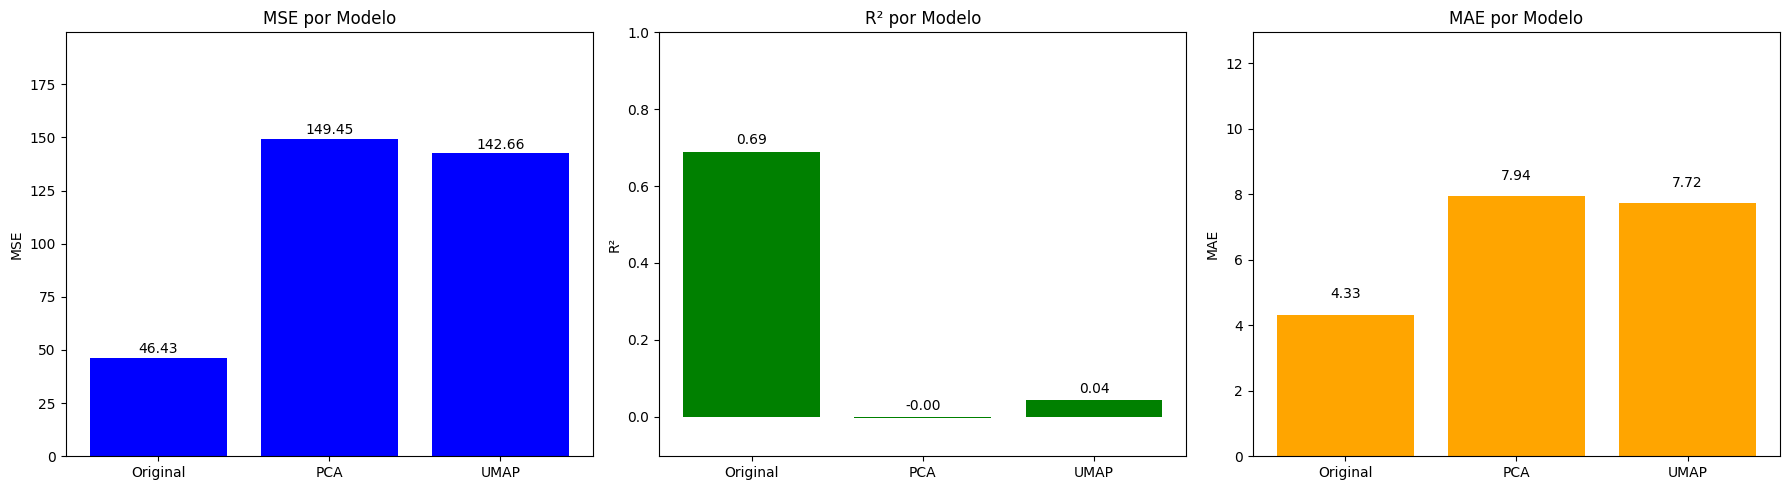

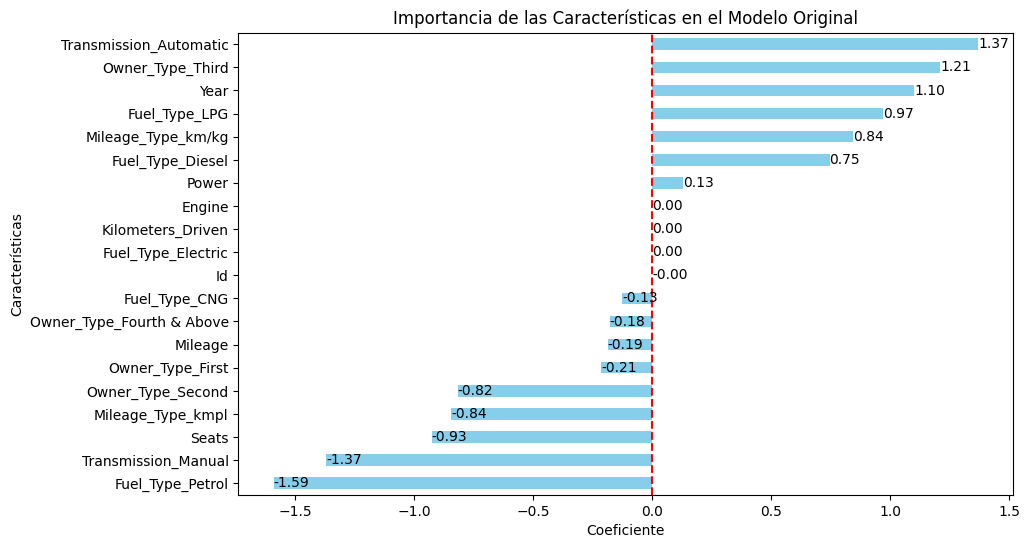

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas
modelos = ['Original', 'PCA', 'UMAP']
mse = [original_metrics['MSE'], pca_metrics['MSE'], umap_metrics['MSE']]
r2 = [original_metrics['R2'], pca_metrics['R2'], umap_metrics['R2']]
mae = [original_metrics['MAE'], pca_metrics['MAE'], umap_metrics['MAE']]

# Crear subgráficos para comparar el rendimiento del modelo
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de MSE
ax[0].bar(modelos, mse, color='blue')
ax[0].set_title('MSE por Modelo')
ax[0].set_ylabel('MSE')
ax[0].set_ylim(0, max(mse) + 50)  # Ajustar el límite superior para mejor visualización

# Añadir etiquetas de valor a las barras
for i, v in enumerate(mse):
    ax[0].text(i, v + 2, f"{v:.2f}", ha='center', color='black')

# Gráfico de R²
ax[1].bar(modelos, r2, color='green')
ax[1].set_title('R² por Modelo')
ax[1].set_ylabel('R²')
ax[1].set_ylim(min(r2) - 0.1, 1)  # Ajustar el límite inferior para mejor visualización

# Añadir etiquetas de valor a las barras
for i, v in enumerate(r2):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center', color='black')

# Gráfico de MAE
ax[2].bar(modelos, mae, color='orange')
ax[2].set_title('MAE por Modelo')
ax[2].set_ylabel('MAE')
ax[2].set_ylim(0, max(mae) + 5)  # Ajustar el límite superior para mejor visualización

# Añadir etiquetas de valor a las barras
for i, v in enumerate(mae):
    ax[2].text(i, v + 0.5, f"{v:.2f}", ha='center', color='black')

plt.tight_layout()
plt.show()

# Gráfico de la importancia de las características
plt.figure(figsize=(10, 6))
importance.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Importancia de las Características en el Modelo Original')
plt.xlabel('Coeficiente')
plt.ylabel('Características')
plt.axvline(0, color='red', linestyle='--')  # Línea vertical en 0 para referencia

# Añadir etiquetas de valor a las barras de importancia
for index, value in enumerate(importance.sort_values(ascending=True)):
    plt.text(value, index, f"{value:.2f}", va='center', ha='left', color='black')

plt.show()